Частина перша: Знайомство з Pandas.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import requests
from io import StringIO

%matplotlib inline

url = 'https://uk.wikipedia.org/wiki/Населення_України'
r = requests.get(url)
website = r.text.replace(',', '.')
data = pd.read_html(StringIO(website), match='Коефіцієнт народжуваності в регіонах України', encoding="UTF-8")
data = data[0]
print(data)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1     —
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

Вивести перші рядки таблиці за допомогою методу head.

In [9]:
data.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,—,—
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,—


Визначте кількість рядків та стовпців у датафреймі (атрибут shape).

In [5]:
data.shape

(28, 9)

Замініть у таблиці значення "—" на значення NaN.

In [10]:
data.replace("—", pd.NA, inplace=True)
print(data)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6  <NA>  <NA>
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2  <NA>
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1  <NA>
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

Визначте типи всіх стовпців за допомогою dataframe.dtypes.

In [11]:
data.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object

Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—".


In [12]:

data['2014'] = pd.to_numeric(data['2014'])
data['2019'] = pd.to_numeric(data['2019'])

data.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object

Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum).

In [13]:
data.isnull().sum()/data.shape[0]

Регіон    0.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64

Видаліть з таблиці дані по всій країні, останній рядок таблиці.

In [14]:
data = data.drop(data.index[-1])
data

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna).

In [15]:
columns_to_fill = ['1950', '1960', '1970', '1990', '2000', '2012', '2014', '2019']

for column in columns_to_fill:
    data[column] = data[column].fillna(data[column].mean()).round(2)

data

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.60,16.0,13.0,7.3,12.6,11.14,8.02
1,Вінницька,22.4,19.20,14.2,12.4,8.4,11.2,10.90,7.60
2,Волинська,24.7,25.00,17.9,15.3,11.2,14.8,14.10,10.10
3,Дніпропетровська,20.4,20.40,15.1,12.3,7.1,11.2,11.10,7.10
4,Донецька,27.1,21.40,14.0,10.9,6.1,9.8,8.20,8.02
5,Житомирська,26.1,22.30,15.9,12.9,8.9,12.2,12.00,7.90
6,Закарпатська,31.4,27.30,20.7,16.8,11.5,15.1,14.60,10.40
7,Запорізька,21.9,19.70,15.0,12.4,7.1,10.6,10.60,6.80
8,Івано-Франківська,24.3,24.80,18.2,15.5,10.3,12.4,12.20,8.80
9,Київська,20.4,18.90,15.6,12.3,7.3,12.2,12.10,8.00


Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні.

In [16]:
data[data['2019'] > data['2019'].mean()][['Регіон', '2019']]

,Регіон,2019
0,Крим,8.02
2,Волинська,10.10
4,Донецька,8.02
6,Закарпатська,10.40
8,Івано-Франківська,8.80
11,Луганська,8.02
12,Львівська,8.70
14,Одеська,8.80
16,Рівненська,10.70
20,Херсонська,8.10


У якому регіоні була найвища народжуваність у 2014 році?

In [13]:
data[['Регіон', '2014']].max()

Регіон    Чернігівська
2014              14.8
dtype: object

 Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році.

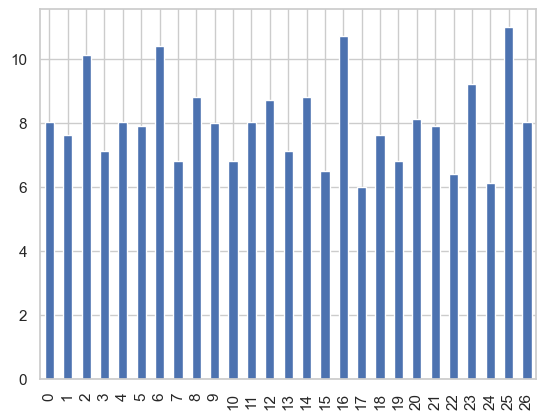

In [17]:
data['2019'].plot.bar()
plt.show()

Додайте від 3 до 5 графіків функцій різного типу на ваш вибір. 
Задайте графікам оформлення, щоб кожен графік у своїй домашній роботі чимось відрізнявся і не був схожим на інші.
Можна використовувати як matplotlib, так і seaborn.

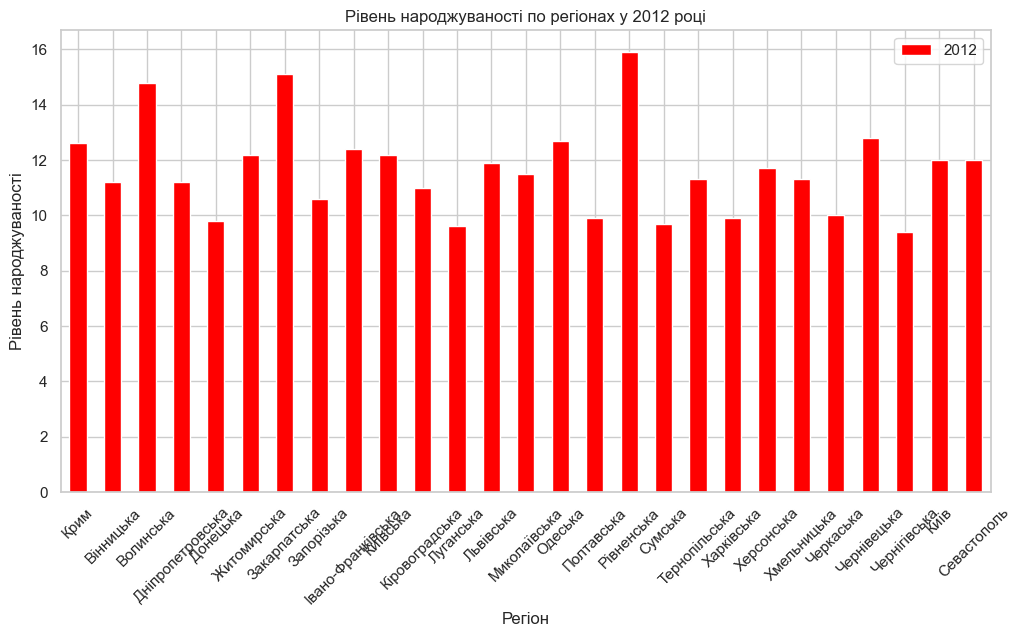

In [24]:
data[['Регіон', '2012']].plot.bar(x='Регіон', y='2012', figsize=(12, 6), color='red')
plt.title('Рівень народжуваності по регіонах у 2012 році')
plt.xlabel('Регіон')
plt.ylabel('Рівень народжуваності')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

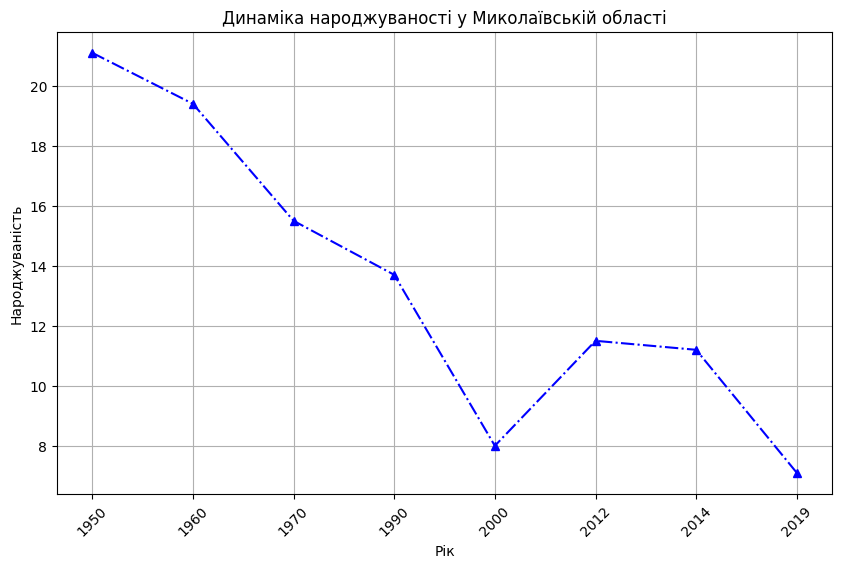

In [3]:
import matplotlib.pyplot as plt
mukol_region = data[data['Регіон'] == 'Миколаївська']
plt.figure(figsize=(10, 6))
plt.plot(data.columns[1:], mukol_region.iloc[0, 1:], marker='^', color='blue', linestyle='-.')
plt.title('Динаміка народжуваності у Миколаївській області')
plt.xlabel('Рік')
plt.ylabel('Народжуваність')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

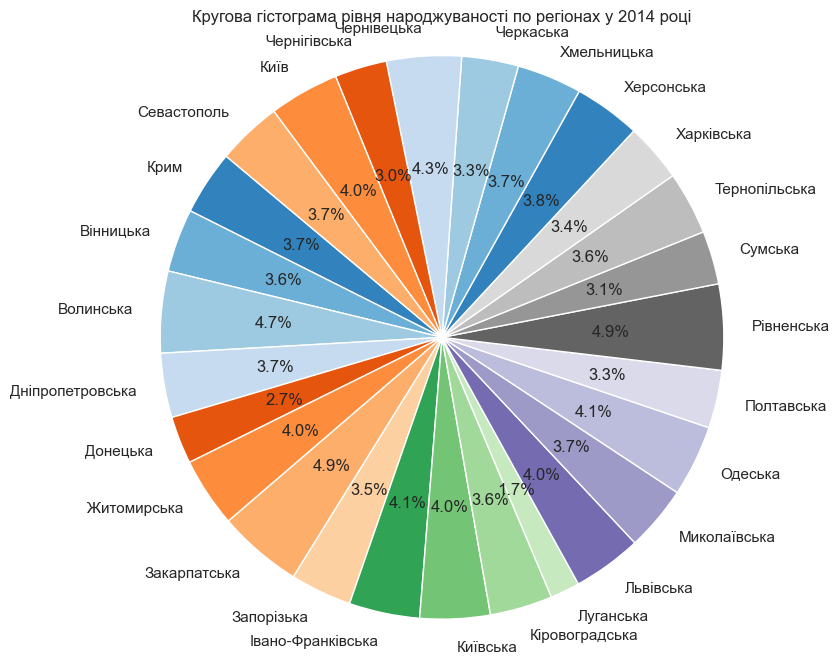

In [21]:

plt.figure(figsize=(8, 8))
colors = sns.color_palette('tab20c', len(data))
plt.pie(data['2014'].dropna(), labels=data['Регіон'], colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Кругова гістограма рівня народжуваності по регіонах у 2014 році')
plt.axis('equal')
plt.show()